In [1]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Changed this option so that I could see the full descriptions
#Otherwise they're abbreviated, since they're so long
pd.set_option('display.max_colwidth', None)

In [3]:
#Read in original cleaned data from pickle file
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\cleaned_data.pkl"
df = pd.read_pickle(path)

In [4]:
#Read in data by subject dataframe from pickle file
path = r"C:\Users\Mandy\Documents\Data science projects\Furman catalog\subject_df.pkl"
subject_df = pd.read_pickle(path)

In [5]:
#let's start with analysis of the original cleaned df by course
#Expand the lists of words into one word per row to find most common words
counts = df.explode("Description")
counts['Description'].value_counts()[:20]

social          256
work            244
introduction    229
research        220
writing         218
development     216
emphasis        208
history         200
reading         188
political       184
focus           177
theory          175
issue           173
cultural        172
culture         167
system          166
experience      165
skill           163
historical      161
practice        160
Name: Description, dtype: int64

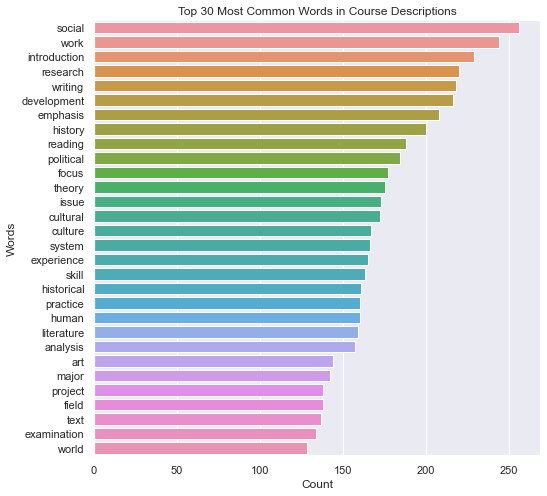

In [6]:
#Graph the top 30 most common words with seaborn
sns.set(rc={"figure.figsize": (8,8)})
fig = sns.countplot(y="Description", data=counts, order=counts["Description"].value_counts().iloc[:30].index)
plt.xlabel("Count")
plt.ylabel("Words")
plt.title("Top 30 Most Common Words in Course Descriptions")
plt.show(fig)

In [7]:
counts.head()

,Course,Name,Description,Original Description
0,ANT 101,Introduction to Anthropology,introduction,"Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
0,ANT 101,Introduction to Anthropology,anthropology,"Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
0,ANT 101,Introduction to Anthropology,human,"Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
0,ANT 101,Introduction to Anthropology,culture,"Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
0,ANT 101,Introduction to Anthropology,past,"Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."


In [8]:
df.head()

,Course,Name,Description,Original Description
0,ANT 101,Introduction to Anthropology,"[introduction, anthropology, human, culture, past, present, comparative, subsistence, regime, economics, stratification, political, organization, marriage, kinship, culture, religion, social, cultural, change]","Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
1,ANT 105,World Prehistory,"[introduction, physical, anthropology, archaeology, human, evolution, human, physical, variation, peopling, world, origin, food, production, comparison, complex, society, around, world]","An introduction to physical anthropology and archaeology. Topics include human evolution, human physical variation, the peopling of the world, the origins of food production and a comparison of complex societies around the world."
2,ANT 202,Peoples of Africa,"[social, anthropological, survey, diverse, people, contemporary, sub, saharan, africa]",Social and anthropological survey of the diverse peoples in contemporary sub-Saharan Africa.
3,ANT 203,Peoples and Cultures of the World,"[ethnographic, survey, global, cultural, diversity, case, africa, america, asia, europe, middle, east, may, daily, life, sociocultural, environmental, change, adaptation, migration, politics, work, religion, gender, family, art, among, foraging, agricultural, industrial, society]","Ethnographic survey of global cultural diversity, with case studies of Africa, the Americas, Asia, Europe, and the Middle East. Topics may include daily life, sociocultural and environmental change and adaptation, migration, politics, work, religion, gender, family, and art among foraging, agricultural, and industrial societies."
4,ANT 204,Modern Japanese Society through Films,"[survey, various, facet, modern, japanese, society, culture, family, community, ethnicity, life, cycle, education, gender, religion, work, popular, culture, well, cultural, aspect, economic, political, system, reading, film]","Survey of various facets of modern Japanese society and culture, including family, community, ethnicity, life cycle, education, gender, religion, work, popular culture, as well as cultural aspects of economic and political systems through readings and films."


In [9]:
#find the longest course description
print(df["Original Description"].map(lambda x: len(x)).max())

1155


In [10]:
#find the shortest
print(df["Original Description"].map(lambda x: len(x)).min())

16


In [11]:
#make a dataframe with a column for the lengths of the original descriptions
desc_len = df.sort_values(by="Original Description", key=lambda x: x.str.len())
desc_len["Length"] = desc_len["Original Description"].str.len()
#desc_len = df.copy()
#desc_len["Length"] = desc_len["Original Description"].apply(lambda x: len(x.split()))
#desc_len = desc_len.sort_values(by="Length")
desc_len.head()

,Course,Name,Description,Original Description,Length
1476,CHM 705,Thesis,"[master, thesis]",Master's thesis,16
1475,CHM 702,Research,"[original, laboratory, research]",Original laboratory research,29
444,ENG 475,Senior Seminar in English,"[change, offering]",Course topic changes with each offering.,41
465,HSC 313,Medical Aspects of Athletics,"[prevention, management, athletic, injury]",Prevention and management of athletic injuries.,48
655,FRN 301,Travel Study French Language,"[emphasis, idiomatic, expression, speech, writing]",Emphasis on idiomatic expression in speech and writing.,56


In [12]:
#the ten shortest descriptions
desc_len.head(10)

,Course,Name,Description,Original Description,Length
1476,CHM 705,Thesis,"[master, thesis]",Master's thesis,16
1475,CHM 702,Research,"[original, laboratory, research]",Original laboratory research,29
444,ENG 475,Senior Seminar in English,"[change, offering]",Course topic changes with each offering.,41
465,HSC 313,Medical Aspects of Athletics,"[prevention, management, athletic, injury]",Prevention and management of athletic injuries.,48
655,FRN 301,Travel Study French Language,"[emphasis, idiomatic, expression, speech, writing]",Emphasis on idiomatic expression in speech and writing.,56
607,MTH 451,Topics in Analysis,"[depth, investigation, selected, analysis]",An in-depth investigation of selected topics in analysis.,58
659,FRN 321,Contemporary Senegal,"[interdisciplinary, introduction, culture, senegal]",An interdisciplinary introduction to the culture of Senegal.,61
911,PHL 200,Logic,"[formal, analysis, argument, emphasis, symbolic, logic]",Formal analysis of arguments with emphasis on symbolic logic.,62
637,CHN 320,Travel Study in Chinese Culture,"[chinese, people, society, culture, civilization]","Study of the Chinese people, society, culture and civilization.",64
1279,ART 125,Drawing II,"[drawing, emphasis, anatomy, human, figure]",More drawing study with emphasis on anatomy and the human figure.,66


In [13]:
pd.reset_option('display.max_colwidth')

In [14]:
#the ten longest descriptions
desc_len.tail(10)

,Course,Name,Description,Original Description,Length
1647,PHL 372,"German Idealism: Mind, Nature and Spirit","[exploration, german, idealist, movement, late...",This course is an exploration of the German Id...,791
1693,ART 272,Success in the Arts,"[class, introduces, business, model, challenge...",This class introduces students to business mod...,792
1694,BUS 271,Social Entrepreneurship and Social Innovation,"[entrepreneur, using, business, method, help, ...",Entrepreneurs are using business methods to he...,811
782,SPN 503,Individualized Internship,"[individualized, internship, typically, develo...",Individualized internships are typically devel...,854
1645,ENG 224,Writing Biography,"[biographer, write, history, life, storytellin...",Biographers write histories of lives. Their st...,857
1341,GRM 505,Structured Internship,"[internship, site, approved, faculty, member, ...",Internships at sites approved by a faculty mem...,909
1340,FRN 505,Structured Internship,"[internship, site, approved, faculty, member, ...",Internships at sites approved by a faculty mem...,909
1342,GRM 503,Individualized Internship,"[individualized, internship, typically, develo...",Individualized internships are typically devel...,1040
1339,FRN 503,Individualized Internship,"[individualized, internship, typically, develo...",Individualized internships are typically devel...,1062
1637,IDS 101,Intro to Intergroup Dialogue,"[diverse, society, intentional, dialogue, soci...","In a diverse society, intentional dialogue abo...",1155


In [15]:
pd.set_option('display.max_colwidth', None)
desc_len.tail(10)

,Course,Name,Description,Original Description,Length
1647,PHL 372,"German Idealism: Mind, Nature and Spirit","[exploration, german, idealist, movement, late, eighteenth, century, early, nineteenth, century, german, idealism, began, response, immanuel, kant, transcendental, idealism, critique, european, enlightenment, highlight, critique, kant, idealism, innovation, idealism, offered, major, figure, jacobi, reinhold, fichte, schelling, schiller, goethe, hölderlin, although, acknowledge, various, transformation, epistemology, metaphysics, post, kantian, era, focus, historical, figure, philosophical, debate, resolution, meaning, nature, human, consciousness, spirit, role, art, poetry, moral, development, romanticism, reason, versus, faith]","This course is an exploration of the German Idealist movement from the late eighteenth century to the early nineteenth century. German Idealism began as a response to Immanuel Kant's transcendental idealism and critique of the European Enlightenment. The course highlights the critiques of Kant's idealism and the innovations in idealism offered by major figures such as Jacobi, Reinhold, Fichte, Schelling, Schiller, Goethe, and Hölderlin. Although we will acknowledge the various transformations in epistemology and metaphysics during this post-Kantian era, the course will focus on these historical figures' philosophical debates and resolutions on the meaning of Nature, human consciousness, Spirit, the role of art and poetry in moral development, romanticism, and reason versus faith.",791
1693,ART 272,Success in the Arts,"[class, introduces, business, model, challenge, entrepreneurial, artist, performing, visual, art, today, marketplace, requires, individual, artist, non, profit, profit, institution, function, professionally, business, class, introduce, different, sector, within, art, non, profit, profit, etc, providing, depth, look, artist, thrive, either, working, contracting, service, choosing, become, part, larger, organization, developing, business, model, specific, art, product, service, audience, development, technique, fund, raising, element, market, basic, gain, understanding, take, successful, within, art, industry]","This class introduces students to business models\nand challenges of entrepreneurial artists in the\nperforming and visual arts. Today?s marketplace\nrequires individual artists, non-profits, and\nfor-profit institutions to function professionally\nas businesses. This class will introduce students\nto different sectors within the arts (non-profit,\nfor-profit, etc.) while providing an in depth look\nat how artists can thrive either working for\nthemselves, contracting their services, or\nchoosing to become a part of a larger\norganization. By developing a business model\nspecific to the arts product and/or service,\nincluding audience development techniques, fund\nraising elements, and market basics, students will\ngain an understanding of what it takes to be\nsuccessful within the Arts industry.",792
1694,BUS 271,Social Entrepreneurship and Social Innovation,"[entrepreneur, using, business, method, help, solve, social, environmental, challenge, otherwise, ignored, missed, commerce, addressed, predominately, often, unsustainable, donor, driven, model, nonprofit, sector, includes, social, intrapreneurship, employee, existing, company, similarly, developing, new, income, opportunity, addressing, social, environmental, challenge, profitable, scalable, manner, social, entrepreneur, vanguard, creating, new, business, model, neglected, market, corporation, emulate, partner, acquire, take, scale, traditional, line, blur, among, nonprofit, government, business, critical, business, understand, opportunity, challenge, new, landscape]","Entrepreneurs are using business methods to help\n solve social and environmental challenges\n otherwise ignored or missed by commerce and\n addressed predominately with often unsustainable\n donor-driven models by the nonprofit sector. This\n course 

In [16]:
#Split course column into subject and course number and create new columns
subject_df_orig_desc = df.copy()
split_course = subject_df_orig_desc["Course"].str.split(" ", n=1, expand=True)
subject_df_orig_desc.insert(0, "Abbreviation", split_course[0])
subject_df_orig_desc.insert(1, "Course Number", split_course[1])
subject_df_orig_desc.head(2)

,Abbreviation,Course Number,Course,Name,Description,Original Description
0,ANT,101,ANT 101,Introduction to Anthropology,"[introduction, anthropology, human, culture, past, present, comparative, subsistence, regime, economics, stratification, political, organization, marriage, kinship, culture, religion, social, cultural, change]","Introduction to anthropology - the study of human cultures in the past and present. Topics include the comparative study of subsistence regimes and economics, stratification and political organization, marriage and kinship, culture, religion, and social and cultural change. 4 credits."
1,ANT,105,ANT 105,World Prehistory,"[introduction, physical, anthropology, archaeology, human, evolution, human, physical, variation, peopling, world, origin, food, production, comparison, complex, society, around, world]","An introduction to physical anthropology and archaeology. Topics include human evolution, human physical variation, the peopling of the world, the origins of food production and a comparison of complex societies around the world."


In [17]:
#Group the df by subject, with one subject per row and all descriptions combined into lists
subject_df_orig_desc = subject_df_orig_desc.groupby("Abbreviation").agg({"Original Description": lambda x: x.tolist()})
subject_df_orig_desc = subject_df_orig_desc.reset_index()
subject_df_orig_desc.head(2)

Abbreviation  \
0          ACC   
1          ADC   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [18]:
subject_df_orig_desc["List Items"] = subject_df_orig_desc["Original Description"].str.len()
subject_df_orig_desc.head()

Abbreviation  \
0          ACC   
1          ADC   
2          ANT   
3          ARB   
4          ART   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [19]:
subject_df_orig_desc["Original Description"] = subject_df_orig_desc["Original Description"].apply(lambda x: " ".join(x))
subject_df_orig_desc.head()

Abbreviation  \
0          ACC   
1          ADC   
2          ANT   
3          ARB   
4          ART   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [20]:
subject_df_orig_desc["Length"] = subject_df_orig_desc["Original Description"].str.len()
#use the line below if you want to do length by words instead of characters
#subject_df_orig_desc["Length"] = subject_df_orig_desc["Original Description"].apply(lambda x:len(x.split()))
subject_df_orig_desc.head()

Abbreviation  \
0          ACC   
1          ADC   
2          ANT   
3          ARB   
4          ART   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [21]:
subject_df_orig_desc["Average Length"] = subject_df_orig_desc["Length"]/subject_df_orig_desc["List Items"]
subject_df_orig_desc.head()

Abbreviation  \
0          ACC   
1          ADC   
2          ANT   
3          ARB   
4          ART   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [22]:
subject_df_orig_desc.drop(columns=["List Items"], inplace=True)
subject_df_orig_desc.drop(columns=["Length"], inplace=True)

In [23]:
subject_df_orig_desc.insert(1, "Subject", subject_df["Subject"])

In [24]:
subject_df_orig_desc.head()

Abbreviation                                Subject  \
0          ACC                             Accounting   
1          ADC  African American and Diaspora Studies   
2          ANT                           Anthropology   
3          ARB                                 Arabic   
4          ART                                    Art   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [25]:
sub_len_df = subject_df_orig_desc.copy()
sub_len_df.drop(columns=["Original Description"], inplace=True)
sub_len_df.head()

,Abbreviation,Subject,Average Length
0,ACC,Accounting,272.187500
1,ADC,African American and Diaspora Studies,102.000000
2,ANT,Anthropology,295.214286
3,ARB,Arabic,112.000000
4,ART,Art,233.444444


In [26]:
sub_len_df = sub_len_df.sort_values(by="Average Length", ascending=False)

In [27]:
sub_len_df[:10]

,Abbreviation,Subject,Average Length
33,FST,Film Studies,508.500000
49,MSL,Military Science Leadership,480.777778
5,AS,Asian Studies,454.000000
9,CEM,Community Engaged Medicine,416.800000
34,FYW,First Year Writing,413.317241
25,EDRD,Literacy Education,411.100000
15,DAN,Dance,393.500000
66,TFA,Summer Undergraduate Research,385.500000
20,EDEP,Extended Program in Education,380.666667
52,MXP,May Experience,375.239130


In [29]:
#can round the results if you want, but i didn't end up using them rounded
sub_len_df["Rounded"] = sub_len_df["Average Length"].round()
sub_len_df.head()

,Abbreviation,Subject,Average Length,Rounded
33,FST,Film Studies,508.500000,508.0
49,MSL,Military Science Leadership,480.777778,481.0
5,AS,Asian Studies,454.000000,454.0
9,CEM,Community Engaged Medicine,416.800000,417.0
34,FYW,First Year Writing,413.317241,413.0


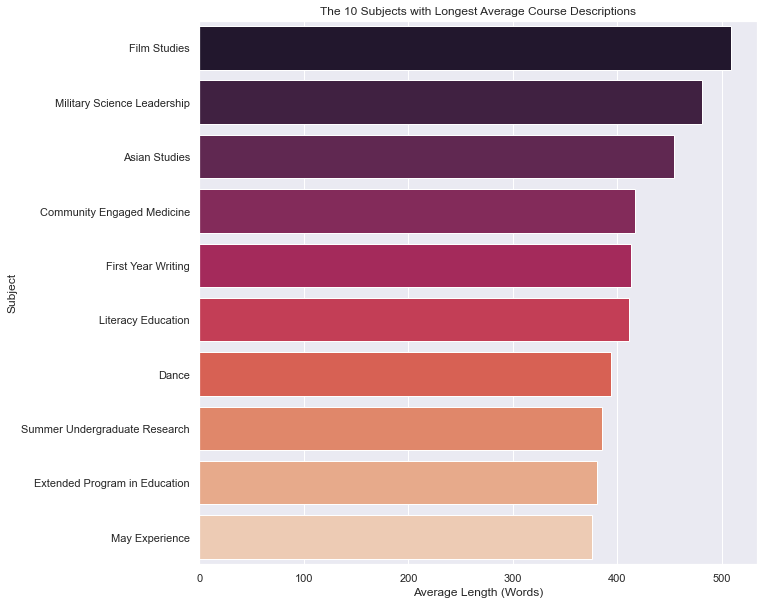

In [28]:
sns.set(rc={"figure.figsize": (10,10)})
fig = sns.barplot(y = "Subject", x = "Average Length", data=sub_len_df[:10], palette="rocket")
plt.xlabel("Average Length (Words)")
plt.title("The 10 Subjects with Longest Average Course Descriptions")
plt.show(fig)

In [30]:
sub_len_df = sub_len_df.sort_values(by="Average Length", ascending=True)
sub_len_df.head(10)

,Abbreviation,Subject,Average Length,Rounded
1,ADC,African American and Diaspora Studies,102.000000,102.0
3,ARB,Arabic,112.000000,112.0
36,GRK,Greek,206.454545,206.0
46,LTN,Latin,206.666667,207.0
47,MES,Middle East and Islamic Studies,216.000000,216.0
42,ITL,Italian,217.000000,217.0
16,DSC,Data Science,222.000000,222.0
56,POL,Politics and International Affairs,231.333333,231.0
58,PVS,Poverty Studies,233.000000,233.0
4,ART,Art,233.444444,233.0


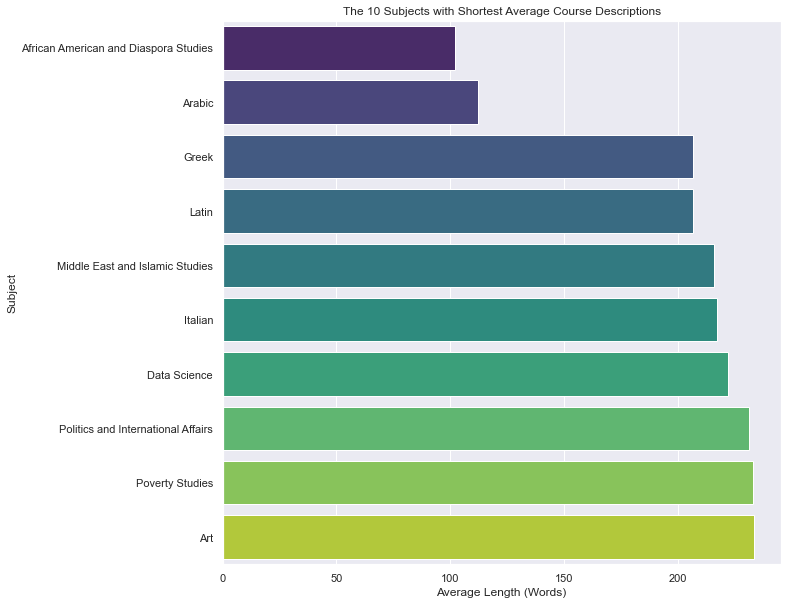

In [31]:
sns.set(rc={"figure.figsize": (10,10)})
fig = sns.barplot(y = "Subject", x = "Average Length", data=sub_len_df[:10], palette="viridis")
plt.xlabel("Average Length (Words)")
plt.title("The 10 Subjects with Shortest Average Course Descriptions")
plt.show(fig)

In [32]:
counts = subject_df.copy()
counts["Counter"] = counts["Description"].apply(Counter)
counts["Common"] = counts["Counter"].apply(lambda x: x.most_common(5))
counts.head()

,Abbreviation,Subject,Description,Counter,Common
0,ACC,Accounting,"[accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, accounting, activity, activity, activity, advanced, allocation, also, analysis, analyzing, application, applied, applied, approved, area, area, assessment, asset, asset, asset, assignment, assurance, assurance, assurance, attitude, audit, auditing, auditing, automated, balance, balance, balance, based, based, based, begin, budget, budgeting, budgeting, business, business, business, business, business, business, capital, capital, cash, cash, change, collection, company, compensation, compliance, component, component, concept, concept, conceptual, context, control, control, control, control, control, corporate, corporate, corporation, corporation, cost, cost, cost, cost, costing, costing, costing, country, cover, coverage, covered, criminal, ...]","{'accounting': 21, 'activity': 3, 'advanced': 1, 'allocation': 1, 'also': 1, 'analysis': 1, 'analyzing': 1, 'application': 1, 'applied': 2, 'approved': 1, 'area': 2, 'assessment': 1, 'asset': 3, 'assignment': 1, 'assurance': 3, 'attitude': 1, 'audit': 1, 'auditing': 2, 'automated': 1, 'balance': 3, 'based': 3, 'begin': 1, 'budget': 1, 'budgeting': 2, 'business': 6, 'capital': 2, 'cash': 2, 'change': 1, 'collection': 1, 'company': 1, 'compensation': 1, 'compliance': 1, 'component': 2, 'concept': 2, 'conceptual': 1, 'context': 1, 'control': 5, 'corporate': 2, 'corporation': 2, 'cost': 4, 'costing': 3, 'country': 1, 'cover': 1, 'coverage': 1, 'covered': 1, 'criminal': 1, 'current': 2, 'cycle': 1, 'data': 1, 'decision': 9, 'department': 1, 'depth': 3, 'derivative': 1, 'design': 1, 'designated': 1, 'determination': 1, 'develop': 1, 'development': 1, 'discussion': 1, 'emphasis': 1, 'encountered': 1, 'engaged': 1, 'enterprise': 5, 'entity': 1, 'environment': 1, 'equity': 1, 'error': 1, 'ethic': 2, 'ethical': 1, 'examination': 1, 'examining': 2, 'experience': 1, 'faculty': 1, 'federal': 1, 'field': 1, 'financial': 7, 'flexible': 1, 'flow': 2, 'focus': 3, 'focusing': 1, 'foreign': 2, 'forensic': 1, 'form': 1, 'fraud': 1, 'functional': 1, 'fund': 1, 'fundamental': 1, 'global': 1, 'governance': 1, 'government': 2, 'governmental': 1, 'implememntation': 1, 'importance': 1, 'income': 5, 'independent': 1, 'individual': 2, 'individualized': 1, 'information': 3, 'intensive': 1, 'interest': 1, ...}","[(accounting, 21), (decision, 9), (financial, 7), (standard, 7), (statement, 7)]"
1,ADC,African American and Diaspora Studies,"[african, american, capstone, culture, diaspora, experience, intedisciplinary, minor, varied]","{'african': 1, 'american': 1, 'capstone': 1, 'culture': 1, 'diaspora': 1, 'experience': 1, 'intedisciplinary': 1, 'minor': 1, 'varied': 1}","[(african, 1), (american, 1), (capstone, 1), (culture, 1), (diaspora, 1)]"
2,ANT,Anthropology,"[adapt, adapt, adaptation, addressed, africa, africa, africa, agricultural, altered, america, america, america, among, ancestor, ancient, animated, anime, anthropological, anthropologist, anthropology, anthropology, anthropology, application, archaeology, archaeology, armchair, around, around, around, art, asia, asia, aspect, assimilation, attempt, attendant, become, behavior, belief, birth, cartoon, case, caused, century, century, change, change, change, change, change, change, character, child, circumstantialism, classic, cognition, communicate, community, comparative, comparative, comparative, comparison, comparison, complex, conceptualization, conceptualize, concern, consciousness, contemporary, contemporary, cosplay, costume, cross, crucial, cultural, cultural, cultural, cultural, cultural, cultural, cultural, cultural, culture, culture, culture, culture, culture, culture, culture, culture, culture, culture, culture, current, cycle, daily, death, de

In [33]:
counts.drop(columns=["Description"], inplace=True)
counts.drop(columns=["Counter"], inplace=True)

In [34]:
#print out 5 most common words for each subject
for row in counts.itertuples():
    print(row.Abbreviation + ": " + row.Subject)
    print()
    for pair in row.Common:
        print(pair[0] + ": " + str(pair[1]))
    print()

ACC: Accounting

accounting: 21
decision: 9
financial: 7
standard: 7
statement: 7

ADC: African American and Diaspora Studies

african: 1
american: 1
capstone: 1
culture: 1
diaspora: 1

ANT: Anthropology

culture: 11
cultural: 8
change: 6
people: 5
religion: 5

ARB: Arabic

arabic: 2
listening: 2
reading: 2
skill: 2
speaking: 2

ART: Art

art: 48
design: 15
emphasis: 14
visual: 13
medium: 12

AS: Asian Studies

asia: 4
area: 1
array: 1
asian: 1
basic: 1

AST: Asian Studies

asia: 11
culture: 6
india: 6
china: 5
development: 5

BIO: Biology

laboratory: 33
field: 20
biology: 18
cell: 16
technique: 16

BUS: Business Administration

business: 24
marketing: 15
management: 13
decision: 12
process: 12

CEM: Community Engaged Medicine

based: 6
discussion: 6
disease: 6
health: 6
issue: 6

CHM: Chemistry

chemistry: 25
chemical: 17
laboratory: 16
introduction: 9
organic: 8

CHN: Chinese

chinese: 31
culture: 11
language: 10
work: 9
writing: 9

CLS: Classics

ancient: 9
greek: 8
survey: 8
world